# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('clientes.csv')
display(df)
display(df.info())

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

In [8]:
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.model_selection import train_test_split as tts, GridSearchCV as GSCV
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN

modelo_decisionTree = RFC(n_estimators=100, random_state=42)
modelo_knn = KNN(n_neighbors=5)


le_profissao = LE()
df['profissao'] = le_profissao.fit_transform(df['profissao'])
le_credito = LE()
df['mix_credito'] = le_credito.fit_transform(df['mix_credito'])
le_pagamento = LE()
df['comportamento_pagamento'] = le_pagamento.fit_transform(df['comportamento_pagamento'])
le_score_credito = LE()
df['score_credito'] = le_score_credito.fit_transform(df['score_credito'])
y = df["score_credito"]
x = df.drop(columns=["score_credito"])

scaler = SS()
X_train, X_test, Y_train, Y_test = tts(x, y, test_size = 0.2, random_state=42, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2]
}

grid_rf = GSCV(RFC(), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print(f"Melhores parâmetros RF: {grid_rf.best_params_}")

X_sample, x_, y_sample, y_ = tts(X_train_scaled, Y_train, train_size=0.1, stratify=Y_train)

param_grid_knn = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GSCV(KNN(), param_grid_knn, cv=3, n_jobs=-1)
grid_knn.fit(X_sample, y_sample)

print(f"Melhores parâmetros KNN: {grid_knn.best_params_}")


/home/familiajardim/Documents/Lukas/desafios/workvenv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores parâmetros RF: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Melhores parâmetros KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [9]:
modelo_decisionTree = RFC(n_estimators=200, max_depth=None, min_samples_leaf=1, random_state=42)
modelo_knn = KNN(n_neighbors=11, metric='manhattan', weights='distance')

modelo_decisionTree.fit(X_train, Y_train)
modelo_knn.fit(X_sample, y_sample)

previsao_arvoredecisao = modelo_decisionTree.predict(X_test)
previsao_knn = modelo_knn.predict(X_test)

from sklearn.metrics import accuracy_score
display(accuracy_score(Y_test, previsao_arvoredecisao))
display(accuracy_score(Y_test, previsao_knn))

/home/familiajardim/Documents/Lukas/desafios/workvenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8339

0.5233

/tmp/ipykernel_38786/2972146498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importancia', y='feature', data=importancias, palette='viridis')


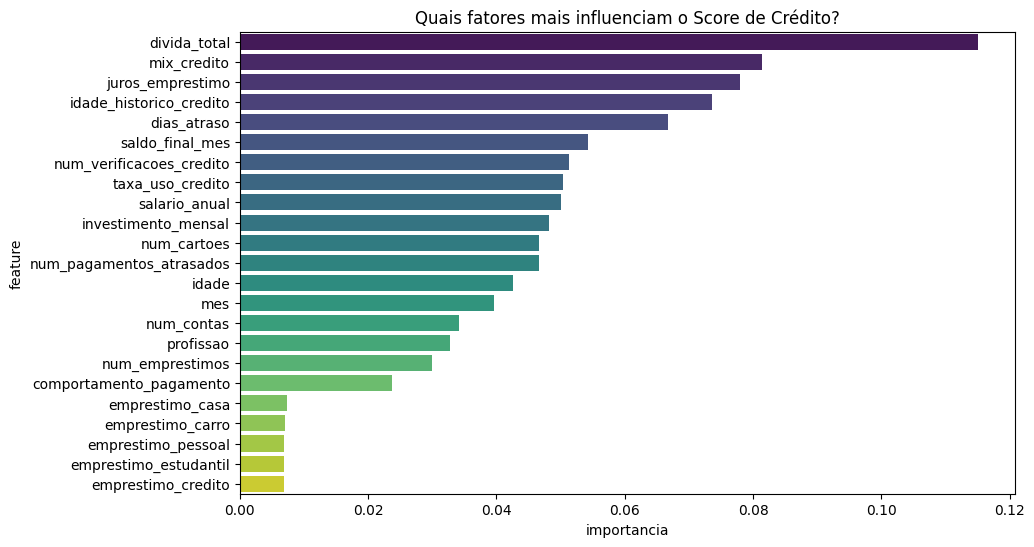

In [10]:
importancias = pd.DataFrame({'feature': x.columns, 'importancia': modelo_decisionTree.feature_importances_})
importancias = importancias.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=importancias, palette='viridis')
plt.title('Quais fatores mais influenciam o Score de Crédito?')
plt.show()

In [12]:
df_new = pd.read_csv('novos_clientes.csv')
display(df_new)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


In [13]:

df_new['profissao'] = le_profissao.transform(df_new['profissao'])
df_new['mix_credito'] = le_credito.transform(df_new['mix_credito'])
df_new['comportamento_pagamento'] = le_pagamento.transform(df_new['comportamento_pagamento'])
df_new['score_credito'] = le_score_credito.transform(df_new['score_credito'])

display(df_new)
new_predict = modelo_decisionTree.predict(df_new)
display(new_predict)

ValueError: invalid literal for int() with base 10: 'empresario'